In [1]:
import tensorflow as tf
import numpy as np
from helper_functions import create_samples
from helper_functions import plot_clusters
from helper_functions import choose_random_centroids
from helper_functions import assign_to_nearest
from helper_functions import update_centroids
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# list all the parameters that will be used
with tf.name_scope("Set_All_Parameters"):
    n_features = 2
    n_clusters = 3
    n_samples_per_cluster = 500
    seed = 700
    embiggen_factor = 70

# use a predetermined seed
np.random.seed(seed)

In [3]:
# call the helper function to generate samples
with tf.name_scope("Create_Samples"):
    centroids, samples = create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor,seed)
with tf.name_scope("Choose_Random_Centroids"):
    centroids = choose_random_centroids(samples, n_clusters)
with tf.name_scope("Cluster_Assignment_Step"):
    nearest_indices = assign_to_nearest(samples,centroids)
with tf.name_scope("Move_Centroid_Step"):
    centroids = update_centroids(samples, nearest_indices, n_clusters)


In [4]:
# initialize all global variables
init = tf.global_variables_initializer()

In [5]:
# run session
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter('C:\\Users\\saurabh B\\TensorFlow-practice\\Tensorflow-Practice\\Tensorflow_practice\\Learning\\Summary_logs', graph=sess.graph)
    sample_values = sess.run(samples)
    for ii in range(50):
        updated_centroids_val = sess.run(centroids)
    print(updated_centroids_val)
    
    

[[-29.23064   25.332664]
 [-24.230062  -6.209781]
 [-13.270634  15.508429]]


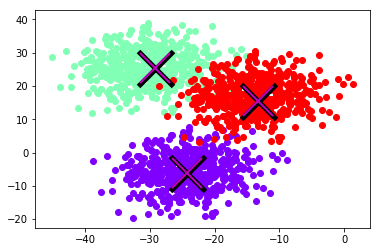

In [6]:
plot_clusters(sample_values, updated_centroids_val, n_samples_per_cluster)

#fig_size = plt.rcParams["figure.figsize"] 
#fig_size[0] = 20
#fig_size[1] = 15
#plt.rcParams["figure.figsize"] = fig_size
plt.show()